In [ ]:
print("Radhe Radhe")

Radhe Radhe


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("crop_yield_dataset.csv")

In [ ]:
df.sample(5)

,soil_type,land_area,temperature,humidity,season,crop_name,fertilizer_type,fertilizer_application_rate_per_hectare,irrigation_availability,planting_week,planting_month,avg_solar_radiation_in_season,CO₂_concentration_in_air_in_season,avg_wind_velocity_in_season,availability_of_pesticides,availability_of_insecticides,predicted_yield
1500,chalky,12.31,35.1,72.3,zaid,sugarcane,organic,382.6,available,46,1,27.85,405.7,7.69,not_available,not_available,83.48
1324,loamy,13.12,32.5,33.3,kharif,barley,chemical,117.2,not_available,28,3,16.82,424.2,9.69,available,available,75.07
1611,silty,1.29,23.8,51.2,kharif,rice,chemical,183.0,not_available,47,10,26.75,426.7,7.90,not_available,not_available,9.34
980,chalky,1.62,30.0,31.5,kharif,cotton,chemical,363.6,not_available,37,6,17.31,414.3,4.24,available,not_available,10.32
87,chalky,8.56,26.4,38.7,zaid,maize,organic,250.6,not_available,4,8,17.67,435.6,4.61,not_available,available,42.96


**soil_type: category (no unit; e.g., clay, sandy, loamy)

land_area: hectares (ha)

temperature: degrees Celsius (°C)

humidity: percent (%)

season: category (no unit; e.g., kharif, rabi, zaid)

crop_name: category (no unit; e.g., wheat, rice, maize)

fertilizer_type: category (no unit; organic, chemical, mixed)

fertilizer_rate_kg_per_ha: kilograms per hectare (kg/ha)

irrigation_availability: category (no unit; available, not_available)

planting_week: week number (1–52; no physical unit)

planting_month: month number (1–12; no physical unit)

avg_solar_radiation_mj_m2_day: megajoules per square meter per day (MJ/m²/day)

co2_concentration_ppm: parts per million (ppm)

avg_wind_velocity_m_s: meters per second (m/s)

pesticide_availability: category (no unit; available, not_available)

insecticide_availability: category (no unit; available, not_available)

predicted_yield: tons (metric tons, total for the field)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   soil_type                                2000 non-null   object 
 1   land_area                                2000 non-null   float64
 2   temperature                              2000 non-null   float64
 3   humidity                                 2000 non-null   float64
 4   season                                   2000 non-null   object 
 5   crop_name                                2000 non-null   object 
 6   fertilizer_type                          2000 non-null   object 
 7   fertilizer_application_rate_per_hectare  2000 non-null   float64
 8   irrigation_availability                  2000 non-null   object 
 9   planting_week                            2000 non-null   int64  
 10  planting_month                           2000 no

In [ ]:
print(df.isnull)

<bound method DataFrame.isnull of      soil_type  land_area  temperature  humidity  season  crop_name  \
0        silty       5.61         31.0      61.1    zaid     cotton   
1        peaty       7.58         30.4      77.4  kharif    soybean   
2        loamy      11.42         27.0      47.5    zaid      wheat   
3        peaty      13.21         33.5      51.3    zaid  sugarcane   
4        peaty       7.07         35.2      71.1  kharif       rice   
...        ...        ...          ...       ...     ...        ...   
1995     peaty       2.34         29.4      42.5    rabi      maize   
1996      clay       2.45         26.5      80.7    rabi  sugarcane   
1997     peaty       1.68         39.0      36.3    rabi      wheat   
1998     loamy       9.13         36.5      62.5    rabi     barley   
1999     sandy       6.96         34.2      48.2  kharif      wheat   

     fertilizer_type  fertilizer_application_rate_per_hectare  \
0           chemical                            

In [ ]:
df.describe()

,land_area,temperature,humidity,fertilizer_application_rate_per_hectare,planting_week,planting_month,avg_solar_radiation_in_season,CO₂_concentration_in_air_in_season,avg_wind_velocity_in_season,predicted_yield
count,2000.000000,2000.0000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.020385,29.9036,54.72660,250.539750,26.307500,6.550500,21.361885,414.973450,6.017145,46.063350
std,4.000890,5.7441,20.30062,86.023541,15.069157,3.444326,3.743997,20.220765,2.317566,21.293879
min,1.000000,20.0000,20.00000,100.000000,1.000000,1.000000,15.010000,380.000000,2.010000,2.060000
25%,4.547500,25.0000,37.77500,177.250000,13.000000,4.000000,18.060000,397.300000,4.040000,29.362500
50%,8.155000,29.9000,55.00000,252.550000,26.000000,7.000000,21.380000,415.000000,5.960000,44.700000
75%,11.475000,34.9000,72.02500,325.150000,39.000000,10.000000,24.580000,432.625000,8.070000,61.507500
max,15.000000,40.0000,90.00000,399.700000,52.000000,12.000000,28.000000,450.000000,10.000000,104.800000


In [ ]:
data=df.copy()

In [ ]:
data.sample(3)

,soil_type,land_area,temperature,humidity,season,crop_name,fertilizer_type,fertilizer_application_rate_per_hectare,irrigation_availability,planting_week,planting_month,avg_solar_radiation_in_season,CO₂_concentration_in_air_in_season,avg_wind_velocity_in_season,availability_of_pesticides,availability_of_insecticides,predicted_yield
12,chalky,2.14,23.2,47.5,rabi,sugarcane,mixed,274.1,available,21,12,16.95,403.8,2.44,not_available,available,26.30
981,sandy,4.89,24.0,59.6,zaid,maize,chemical,350.7,not_available,23,11,26.20,441.9,9.89,available,not_available,36.83
1812,silty,8.19,37.2,84.2,kharif,barley,mixed,276.8,available,28,11,15.85,389.2,3.85,not_available,available,66.23


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = [
    "soil_type", "season", "crop_name",
    "fertilizer_type", "irrigation_availability",
    "availability_of_pesticides", "availability_of_insecticides"
]

In [ ]:
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
data.corr()

,soil_type,land_area,temperature,humidity,season,crop_name,fertilizer_type,fertilizer_application_rate_per_hectare,irrigation_availability,planting_week,planting_month,avg_solar_radiation_in_season,CO₂_concentration_in_air_in_season,avg_wind_velocity_in_season,availability_of_pesticides,availability_of_insecticides,predicted_yield
soil_type,1.000000,0.019082,0.001183,-0.014159,0.013095,0.036674,-0.004679,-0.020061,-0.021475,-0.009854,0.008867,-0.029464,-0.023042,0.024477,0.036510,0.028829,0.042006
land_area,0.019082,1.000000,0.028518,0.031082,0.017426,-0.015793,-0.037038,0.000126,-0.000179,-0.007263,-0.022053,-0.006594,-0.011548,-0.042790,0.015896,-0.035254,0.852355
temperature,0.001183,0.028518,1.000000,0.005592,-0.002058,-0.005459,0.028054,0.019062,-0.010239,0.016308,-0.015104,-0.064472,-0.018416,-0.006007,-0.000685,-0.005020,0.027109
humidity,-0.014159,0.031082,0.005592,1.000000,-0.004979,-0.029904,-0.047186,0.010200,-0.014229,0.012099,-0.034866,-0.021785,0.032036,0.006051,0.014221,-0.031518,0.031172
season,0.013095,0.017426,-0.002058,-0.004979,1.000000,0.014421,0.009399,-0.002410,-0.014988,0.009273,0.010282,0.016066,-0.031940,0.033066,0.035969,0.012434,0.022108
crop_name,0.036674,-0.015793,-0.005459,-0.029904,0.014421,1.000000,-0.032715,-0.038508,-0.013350,0.010474,-0.026284,0.000825,0.002695,-0.030113,-0.000457,-0.013994,-0.011574
fertilizer_type,-0.004679,-0.037038,0.028054,-0.047186,0.009399,-0.032715,1.000000,0.021002,0.030059,0.049282,0.026358,-0.019178,-0.042653,0.000742,0.017718,0.011483,-0.045643
fertilizer_application_rate_per_hectare,-0.020061,0.000126,0.019062,0.010200,-0.002410,-0.038508,0.021002,1.000000,0.004795,0.046518,-0.022941,0.033409,-0.005577,0.006290,0.004297,0.050019,-0.014703
irrigation_availability,-0.021475,-0.000179,-0.010239,-0.014229,-0.014988,-0.013350,0.030059,0.004795,1.000000,-0.020222,-0.024738,-0.055971,0.012789,-0.019949,-0.008590,0.003508,-0.338220
planting_week,-0.009854,-0.007263,0.016308,0.012099,0.009273,0.010474,0.049282,0.046518,-0.020222,1.000000,0.000004,0.026055,-0.005533,0.039036,-0.012744,-0.009543,-0.006747


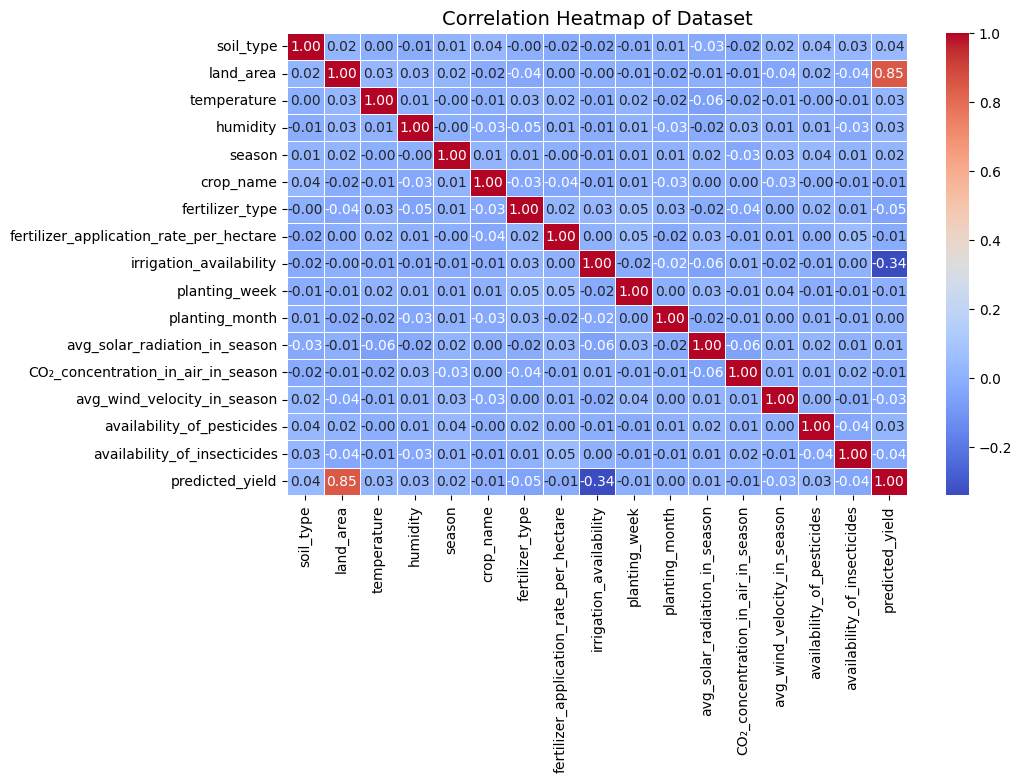

In [ ]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Dataset", fontsize=14)
plt.show()

In [ ]:
x=data.drop("predicted_yield",axis=1)
y=data["predicted_yield"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 6.87
MSE: 77.88
R² Score: 0.82


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.807443250272476


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200,250, 300],
    'max_depth': [ 5,6, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [ ]:
grid_search=GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # use all CPU cores
    verbose=2,
    scoring='r2'
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=200,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [5, 6, 7, 9],
                         'n_estimators': [100, 200, 250, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='r2', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score (CV): 0.8243121705836364


In [ ]:
xgb_best=XGBRegressor(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42
)

In [ ]:
xgb_best.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_best.predict(x_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.8234739303372997


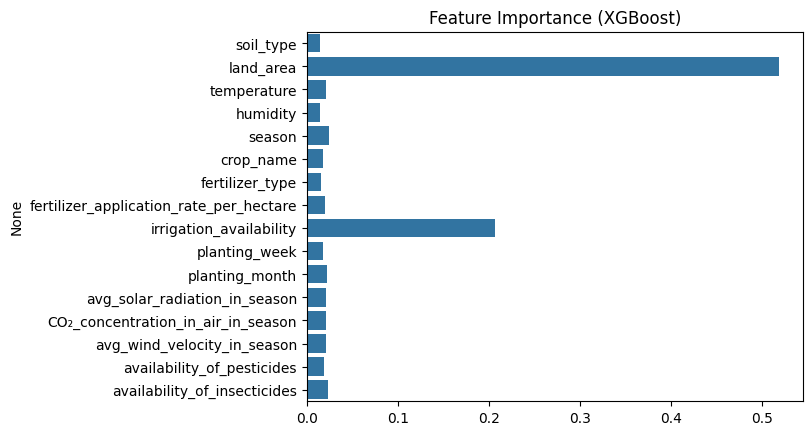

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x=xgb_best.feature_importances_,
    y=x.columns
)
plt.title("Feature Importance (XGBoost)")
plt.show()


In [ ]:
import joblib

joblib.dump(xgb_best, "crop_yield_model.pkl")


['crop_yield_model.pkl']